# Project 1

## warm up

### Task 1.1


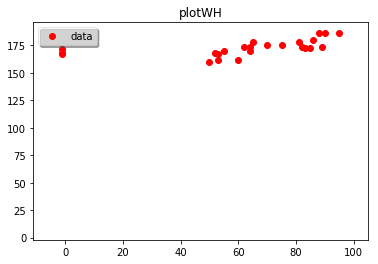

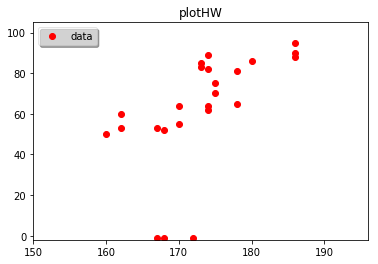

In [6]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt


def plotData2D(X, title):
    # create a figure and its axes
    fig = plt.figure()
    axs = fig.add_subplot(111)

    # see what happens, if you uncomment the next line
    # axs.set_aspect('equal')
    
    # plot the data 
    axs.plot(X[0,:], X[1,:], 'ro', label='data')

    # set x and y limits of the plotting area
    xmin = X[0,:].min()
    xmax = X[0,:].max()
    axs.set_xlim(xmin-10, xmax+10)
    axs.set_ylim(-2, X[1,:].max()+10)

    # set properties of the legend of the plot
    leg = axs.legend(loc='upper left', shadow=True, fancybox=True, numpoints=1)
    leg.get_frame().set_alpha(0.5)

    plt.title(title)
    plt.show()
    # either show figure on screen or write it to disk
    #if filename == None:
    #    plt.title(title)
    #    plt.show()
    #else:
    #    plt.savefig(filename, facecolor='w', edgecolor='w',
    #                papertype=None, format='pdf', transparent=False,
    #                bbox_inches='tight', pad_inches=0.1)
    



#######################################################################
# 1st alternative for reading multi-typed data from a text file
#######################################################################
# define type of data to be read and read data from file
dt = np.dtype([('w', np.float), ('h', np.float), ('g', np.str_, 1)])
data = np.loadtxt('whData.dat', dtype=dt, comments='#', delimiter=None)

# read height, weight and gender information into 1D arrays
ws = np.array([d[0] for d in data])
hs = np.array([d[1] for d in data])
gs = np.array([d[2] for d in data]) 


##########################################################################
# 2nd alternative for reading multi-typed data from a text file
##########################################################################
# read data as 2D array of data type 'object'
data = np.loadtxt('whData.dat',dtype=np.object,comments='#',delimiter=None)

# read height and weight data into 2D array (i.e. into a matrix)
X = data[:,0:2].astype(np.float)

# read gender data into 1D array (i.e. into a vector)
y = data[:,2]

# let's transpose the data matrix 
X = X.T

# now, plot weight vs. height using the function defined above
plotData2D(X, 'plotWH')

# next, let's plot height vs. weight 
# first, copy information rows of X into 1D arrays
w = np.copy(X[0,:])
h = np.copy(X[1,:])

# second, create new data matrix Z by stacking h and w
Z = np.vstack((h,w))

# third, plot this new representation of the data
plotData2D(Z, 'plotHW')


### Task 1.1

Plot the data without the outliers (Plot only positive weight entries)

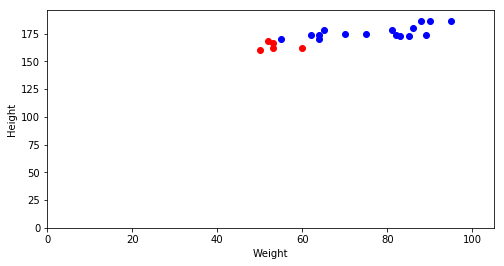

In [45]:
data = np.loadtxt('whData.dat',
                  dtype=np.object,
                  comments='#',
                  delimiter=None)

W = data[:,0].astype('float32')
H = data[:,1].astype('float32')
G = data[:,2]

w_mask = ((W > 0) * 1).nonzero()

W = W[w_mask]
H = H[w_mask]
G = G[w_mask]

male_mask = ((G == 'm') * 1).nonzero()
W_m = W[male_mask]
H_m = H[male_mask]

female_mask = ((G == 'f') * 1).nonzero()
W_f = W[female_mask]
H_f = H[female_mask]

fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(111)
ax.set_ylim([0, np.max(H)+10])
ax.set_xlim([0, np.max(W)+10])
ax.set_ylabel('Height')
ax.set_xlabel('Weight')
ax.scatter(W_m, H_m, color='blue')
ax.scatter(W_f, H_f, color='red')
plt.show()